In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("2.txt",header=18 , sep="\t")
print(df)
from scipy import stats


       Fecha         Hora  f_i  f_f  Δt TIPO  \
0   20151016  13:28-13:30  145  100   2   II   
1   20151104  13:43-13:46   90   70   2   II   
2   20160504  14:03-14:09   65   46   6   II   
3   20160710  01:01-01:08  170   50   7   II   
4   20170401  23:01-23:06  220   70   5   II   
5   20171020  23:30-23:38  125   60   8   II   
6   20170912  19:12-19:18   80   50   6   II   
7   20210507  19:09-19:18   90   50   9   II   
8   20210923  15:28-15:32  120   50   4  II?   
9   20211028  15:28-15:50   90   50  22   II   
10  20220302  17:39-17:56   90   50  17   II   
11  20220314  17:21-17:37   70   50  16   II   
12  20220330  17:31-17:55  100   50  14   II   
13  20220331  18:34-18:55   80   60  21   II   
14  20220402  13:23-13:38   90   50  15   II   
15  20220510  13:58-14:22   80   45  24   II   
16  20220511  18:39-18:50   90   45  11   II   
17  20220511  18:57-19:15   80   45   9   II   
18  20220524  22:22-22:32   60   45  10   II   
19  20220525  18:17-18:23   80   55   6 

In [3]:
#df['srbhconcmeh'].mean()


In [4]:
#stats.pearsonr(df['V'], df['Vel'])

In [5]:
#Quitar los eventos con - v
ndf=pd.DataFrame(df)
quitar=[]
for a in range(len(df.Fecha)):
    #print(df.iloc[a][-1])
    if ndf.iloc[a][-2] == '-':
        #print(a)
        quitar.append(a)
        #print(df.iloc[a][-2])
df=df.drop(quitar)
#print(df)

df=df.reset_index(drop=True)


#Quitar los eventos con - sb
ndf=pd.DataFrame(df)
quitar=[]
for a in range(len(df.srbhconcmeh)):
    #print(df.iloc[a][-1])
    if ndf.iloc[a][-1] == '-':
        #print(a)
        quitar.append(a)
        #print(df.iloc[a][-1])
df=df.drop(quitar)
#print(df)

In [6]:
#
#FÓRMULAS USADAS
#
#v=(2/f)(df/dt)*H
#Considerando f como f_i
#v=(2/f_i)(df/dt)*H

#H=(ndr/dn)
#Considerando n como n_m
#H=(n_m*dr/dn)
#____________________________________________________
#dr
#para la distancia heliocéntrica
# Si Rd=(no/ne)**.5, entonces
##dr=-(no**.5)/(2*(ne)**(3/2))

#dn
#para la delta de densidad de partículas
##dn=1/(2df/9000)**2

#n
#para la densidad (media) se considera que
#Si para un plasma neutro n=2ne (considerando p+, y e-), y
#ne[cm-3]=(fp/9000)**2
#Y con para la frecuencia media
#f_m=f_i+df/2
#entonces
#n_m= (2* ((f_i+df/2)/9000)**2)
#____________________________________________________


# Para Δf
df.Δt=df.Δt*60
deltaefe=df.f_i-df.f_f


#VELOCIDAD
#Considerando H=L=3.6e5
#y vel inicial con f_1
H=L=3.6e5
vel=(((2*H)/(df.f_i))*((deltaefe)/(df.Δt)))

#Considerando f media
efe=df.f_i-(deltaefe/2)
#f en MHz, t en s, 
velocidad=(deltaefe/df.Δt)*(2*L)/efe

df=df.assign(Vel=velocidad)
for a in range(len(df['V'])):
    if df['V'][a]!='-':
        df['V'][a]=int(df['V'][a])

for a in range(len(df['V'])):
    if df['srbhconcmeh'][a]!='-':
        df['srbhconcmeh'][a]=float(df['srbhconcmeh'][a])

/tmp/ipykernel_21671/1779837953.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'][a]=int(df['V'][a])
/tmp/ipykernel_21671/1779837953.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['srbhconcmeh'][a]=float(df['srbhconcmeh'][a])


In [7]:
#para relaconar con densidad las frecuencias en Hz
#para convertir de 1/cm3 a 1/m3 multiplicar cm por 1e-6
#df.f_i=df.f_i*10e6
#df.f_f=df.f_f*10e6
##################################################

#____________________________________________________
#
#Variables de la altura de escala de densidad 
#             o 'density scale height' (H)
#


In [8]:
lancea=pd.DataFrame()
lanceb=pd.DataFrame()
mexar=pd.DataFrame()
#instr=pd.DataFrame(columns=['A','B','C'])
#print(instr)

#SEPARAR EN UN CUADRO DE DATOS A CADA INSTRUMENTO
for a in range(len(df['VISTO POR'])):
    if ('LANCE-A') in (df['VISTO POR'][a]):
        lancea=lancea.append(df.iloc[a])
    if ('LANCE-B') in (df['VISTO POR'][a]):
        lanceb=lanceb.append(df.iloc[a])
    if ('MEXART') in (df['VISTO POR'][a]):
        mexar=mexar.append(df.iloc[a])

#print(lancea)

/tmp/ipykernel_21671/1830145487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_21671/1830145487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_21671/1830145487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_21671/1830145487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_21671/1830145487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=

In [9]:
#print(mexar)

In [10]:
    #LANCES VEN A MENOS DE 90 MHz
lancea=lancea.reset_index(drop=True)
lanceb=lanceb.reset_index(drop=True)

for a in range(len(lancea['f_i'])):
        if (lancea.at[a,'f_i'])>90:
            lancea.at[a,'f_i']=90
        
for a in range(len(lanceb['f_i'])):
        if (lanceb.at[a,'f_i'])>90:
            lanceb.at[a,'f_i']=90
        
mexar=mexar.reset_index(drop=True)
print(mexar)


       Fecha         Hora  f_i  f_f    Δt TIPO  \
0   20151016  13:28-13:30  145  100   120   II   
1   20151104  13:43-13:46   90   70   120   II   
2   20160504  14:03-14:09   65   46   360   II   
3   20171020  23:30-23:38  125   60   480   II   
4   20170912  19:12-19:18   80   50   360   II   
5   20210507  19:09-19:18   90   50   540   II   
6   20210923  15:28-15:32  120   50   240  II?   
7   20211028  15:28-15:50   90   50  1320   II   
8   20220302  17:39-17:56   90   50  1020   II   
9   20220314  17:21-17:37   70   50   960   II   
10  20220330  17:31-17:55  100   50   840   II   
11  20220402  13:23-13:38   90   50   900   II   
12  20220510  13:58-14:22   80   45  1440   II   
13  20220525  18:17-18:23   80   55   360   II   

                                       VISTO POR      Fecha1 Hora_i Hora_pk  \
0                                         MEXART  2015-10-16  13:20   13:24   
1                                         MEXART  2015-11-04  13:31   13:52   
2           

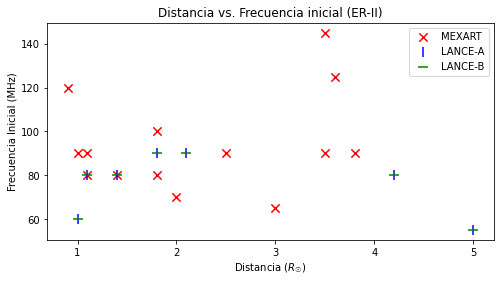

In [11]:
#Distancia vs frecuencia inicial           juntas

plt.rcParams["figure.figsize"] = [8.0, 4.0]
#plt.rcParams["figure.autolayout"] = True
        
mexar.sort_values('srbhconcmeh', inplace=True)
lancea.sort_values('srbhconcmeh', inplace=True)
lanceb.sort_values('srbhconcmeh', inplace=True)

fig, ax = plt.subplots()

mexar.plot('srbhconcmeh',y='f_i', kind='scatter', color='r',title='Distancia vs. Frecuencia inicial (ER-II)', marker='x', label='MEXART',s=70,ax=ax)
lancea.plot('srbhconcmeh',y='f_i',ax=ax, kind='scatter', color='b',marker='|',s=100,label='LANCE-A',)

lanceb.plot('srbhconcmeh',y='f_i',ax=ax,xlabel='Distancia ($R_☉$)',ylabel='Frecuencia Inicial (MHz)', kind='scatter', color='g',marker='_',s=100,label='LANCE-B',)

plt.legend()

plt.savefig('fivsdist_todas.svg')
plt.show()

In [12]:
# Para Δf
mexar.Δt=mexar.Δt/60
lancea.Δt=lancea.Δt/60
lanceb.Δt=lanceb.Δt/60

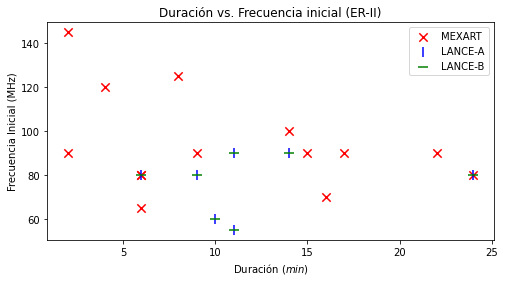

In [13]:
#duracion vs frecuencia inicial           juntas

plt.rcParams["figure.figsize"] = [8.0, 4.0]
#plt.rcParams["figure.autolayout"] = True
        
mexar.sort_values('srbhconcmeh', inplace=True)
lancea.sort_values('srbhconcmeh', inplace=True)
lanceb.sort_values('srbhconcmeh', inplace=True)

fig, ax = plt.subplots()

mexar.plot('Δt',y='f_i', kind='scatter', color='r',title='Duración vs. Frecuencia inicial (ER-II)', marker='x', label='MEXART',s=70,ax=ax)
lancea.plot('Δt',y='f_i',ax=ax, kind='scatter', color='b',marker='|',s=100,label='LANCE-A',)

lanceb.plot('Δt',y='f_i',ax=ax,xlabel='Duración ($min$)',ylabel='Frecuencia Inicial (MHz)', kind='scatter', color='g',marker='_',s=100,label='LANCE-B',)

plt.legend()

plt.savefig('fivsduracion_todas.svg')
plt.show()

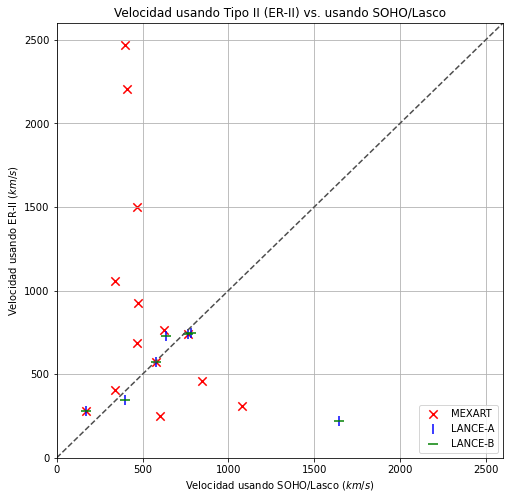

In [14]:
#velocidad calculada vs  vista                 (todas)

plt.rcParams["figure.figsize"] = [8.0, 8.0]
#plt.rcParams["figure.autolayout"] = True
        
mexar.sort_values('srbhconcmeh', inplace=True)
lancea.sort_values('srbhconcmeh', inplace=True)
lanceb.sort_values('srbhconcmeh', inplace=True)

fig, ax = plt.subplots()
ax.set_ylim((0,2600))
ax.set_xlim((0,2600))
mexar.plot('V',y='Vel', kind='scatter', color='r',title='Velocidad usando Tipo II (ER-II) vs. usando SOHO/Lasco', marker='x',s=70, label='MEXART',ax=ax)
lancea.plot('V',y='Vel',ax=ax, kind='scatter', color='b',marker='|',s=100,label='LANCE-A',)

lanceb.plot('V',y='Vel',grid=True,ax=ax,xlabel='Velocidad usando SOHO/Lasco ($km/s$)',ylabel='Velocidad usando ER-II ($km/s$)', kind='scatter', color='g',marker='_',s=100,label='LANCE-B',)
plt.legend()
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.savefig('vcalcvsobs_todas.svg')
plt.show()

In [15]:
print(df)

       Fecha         Hora  f_i  f_f    Δt TIPO  \
0   20151016  13:28-13:30  145  100   120   II   
1   20151104  13:43-13:46   90   70   120   II   
2   20160504  14:03-14:09   65   46   360   II   
3   20171020  23:30-23:38  125   60   480   II   
4   20170912  19:12-19:18   80   50   360   II   
5   20210507  19:09-19:18   90   50   540   II   
6   20210923  15:28-15:32  120   50   240  II?   
7   20211028  15:28-15:50   90   50  1320   II   
8   20220302  17:39-17:56   90   50  1020   II   
9   20220314  17:21-17:37   70   50   960   II   
10  20220330  17:31-17:55  100   50   840   II   
11  20220402  13:23-13:38   90   50   900   II   
12  20220510  13:58-14:22   80   45  1440   II   
13  20220511  18:39-18:50   90   45   660   II   
14  20220511  18:57-19:15   80   45   540   II   
15  20220524  22:22-22:32   60   45   600   II   
16  20220525  18:17-18:23   80   55   360   II   
17  20220528  16:00-16:11   55   45   660   II   

                                       VISTO POR 

In [16]:
#    Pearson’s r (0,4063—same as we got in Excel, R, etc.)
 #   A p-value. This is the probability that the true value of r is zero (no correlation).

stats.pearsonr(df['V'], df['Vel'])

(-0.35093080801306964, 0.15332874494389756)

In [17]:
stats.pearsonr(mexar['Vel'], mexar['V'])

(-0.3183954897028031, 0.26723814043372507)

In [18]:
stats.pearsonr(lancea['Vel'], lancea['V'])

(-0.14147654656175873, 0.7622183765543727)

In [19]:
stats.pearsonr(lanceb['Vel'], lanceb['V'])


(-0.14147654656175873, 0.7622183765543727)